## DECISION TREE CLASSIFIER USING Scikit-learn

### Creating and Visualizing a Decision Tree Classification Model in Machine Learning

### Problem statement:  To predict the safety of the car. 

In this project, I have build a Decision Tree Classifier to predict the safety of the car. I have implemented Decision Tree Classification with Python and Scikit-Learn.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

 ### Import dataset

In [2]:
data = '/Users/sushmapawar/Desktop/Projects/Decision_Tree_dataset/car.data'

df = pd.read_csv(data, header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


###  Exploratory data analysis

In [3]:
# Dimensions of dataset

df.shape

(1728, 7)

In the dataset there are 1728 instances(rows) and 7 variables(columns).

In [4]:
# View the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Rename column names
The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns.

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [6]:
# Review the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Column names are renamed.Columns have meaningful names.

### View summary of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables
Check the frequency counts of categorical variables.

In [8]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:   
    print(df[col].value_counts())   

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So,treat them as categorical variables.

### Summary of variables
There are 7 variables(columns) in the dataset. All the variables are of categorical data type.

These are given by buying, maint, doors, persons, lug_boot, safety and class.

class is the target variable.

#### Counts of class variable

In [9]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The class target variable is ordinal in nature.

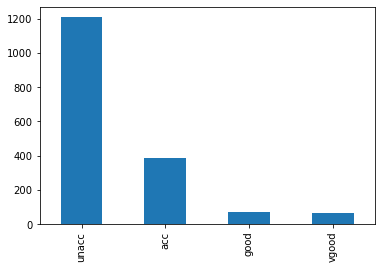

In [10]:
df['class'].value_counts().plot(kind = 'bar')
plt.show()

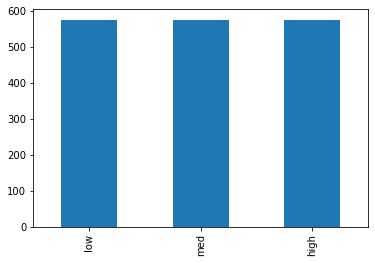

In [11]:
df['safety'].value_counts().plot(kind = 'bar')
plt.show()

#### Missing(NULL) values in variables

In [12]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

There are no missing values in the dataset

In [13]:
df['class'] = df['class'].replace({"unacc" : 0 ,"acc" : 1,"good" : 2,"vgood" : 3})

 ### Declare feature  and target variable

In [14]:
X = df.drop(['class'], axis=1)
y = df['class']
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: class, Length: 1728, dtype: int64

### Split data into separate training and test set

In [15]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

### Feature Engineering
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

Check the data types of variables again.

In [17]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

#### Encode categorical variables
Encode the categorical variables.

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


All the variables are ordinal categorical data type.

In [19]:
!pip install category_encoders

In [20]:
# import category encoders

import category_encoders as ce

In [21]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [23]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


Training and Test set ready for model building.

 ### Decision Tree Classifier with criterion gini index

In [24]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
# instantiate the DecisionTreeClassifier model with criterion gini index

dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)


# fit the model
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [26]:
dt_gini.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

### Predict the Test set results with criterion gini index

In [27]:
y_pred_gini = dt_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8441


### Check precision score with criterion gini index

In [29]:
from sklearn.metrics import precision_score
print('Model precision score with criterion gini index: {0:0.4f}'. format(precision_score(y_test, y_pred_gini,average='weighted')))

Model precision score with criterion gini index: 0.8520


### Check recall score with criterion gini index

In [30]:
from sklearn.metrics import recall_score
print('Model recall score with criterion gini index: {0:0.4f}'. format(recall_score(y_test, y_pred_gini,average='weighted')))

Model recall score with criterion gini index: 0.8441


y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

In [31]:
y_pred_train_gini = dt_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 1, 0, 2])

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8539


### Compare the train-set and test-set accuracy
Compare the train-set and test-set accuracy to check for overfitting.
#### Check for overfitting and underfitting

In [33]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_gini.score(X_test, y_test)))

Training set score: 0.8539
Test set score: 0.8441


The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

In [34]:
feature_names = X.columns
feature_names

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [35]:
dt_gini.feature_importances_

array([0.10302053, 0.23770072, 0.        , 0.38509341, 0.        ,
       0.27418534])

In [36]:
feature_importance = pd.DataFrame(dt_gini.feature_importances_,index = feature_names).sort_values(0,ascending= False)
feature_importance

,0
persons,0.385093
safety,0.274185
maint,0.237701
buying,0.103021
doors,0.000000
lug_boot,0.000000


In [37]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['persons', 'safety', 'maint', 'buying']

<AxesSubplot:>

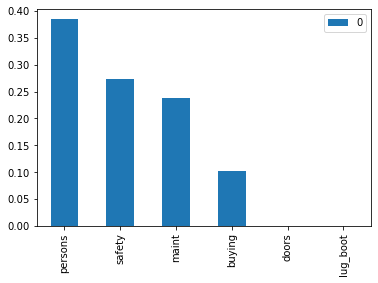

In [38]:
feature_importance.head(10).plot(kind='bar')

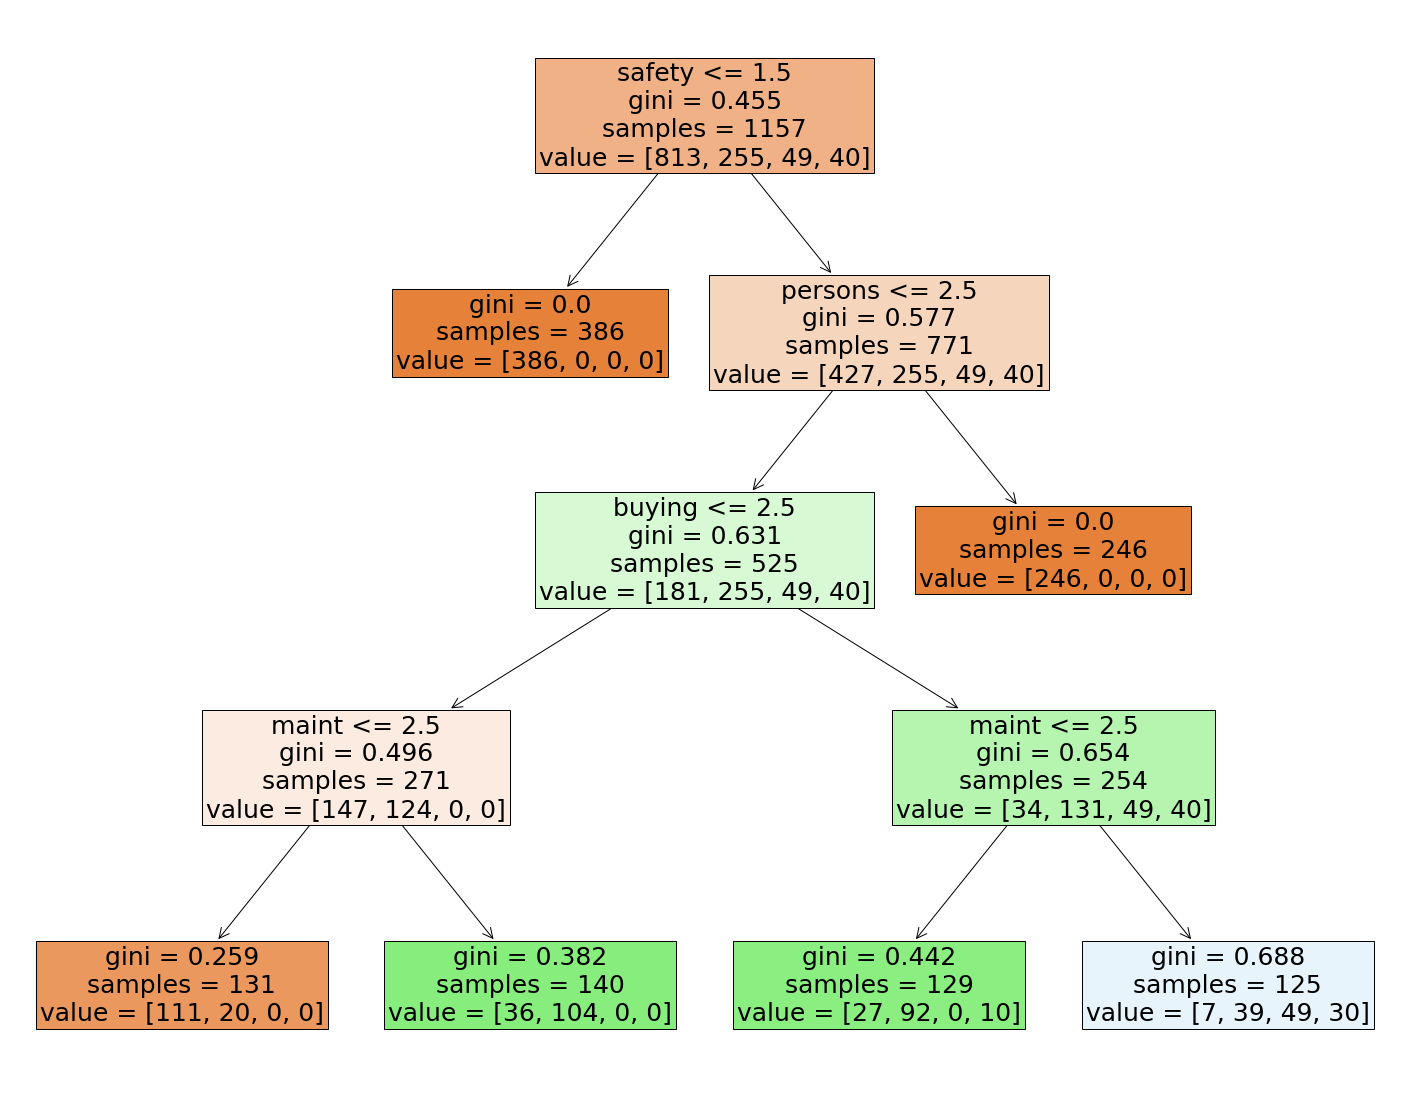

In [39]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_gini,feature_names=feature_names,class_names=None
                   , filled=True,fontsize=25)

### Decision Tree Classifier with criterion entropy

In [40]:
# instantiate the DecisionTreeClassifier model with criterion entropy
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
# fit the model
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

### Predict the Test set results with criterion entropy

In [41]:
y_pred_en = dt_en.predict(X_test)

### Check accuracy score with criterion entropy

In [42]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.8424


### Check precision score with criterion entropy

In [43]:
from sklearn.metrics import precision_score
print('Model precision score with criterion entropy: {0:0.4f}'.format(precision_score(y_test, y_pred_en,average='weighted')))

Model precision score with criterion entropy: 0.8660


### Check recall score with criterion entropy

In [44]:
from sklearn.metrics import recall_score
print('Model recall score with criterion entropy: {0:0.4f}'.format(recall_score(y_test, y_pred_en,average='weighted')))

Model recall score with criterion entropy: 0.8424


In [45]:
y_pred_train_en = dt_en.predict(X_train)

y_pred_train_en

array([0, 0, 1, ..., 1, 0, 2])

In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8341


### Compare the train-set and test-set accuracy
Compare the train-set and test-set accuracy to check for overfitting.

### Check for overfitting and underfitting

In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_en.score(X_test, y_test)))

Training set score: 0.8341
Test set score: 0.8424


The training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.

Now, based on the above analysis we can conclude that our classification model accuracy is very good.
Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

In [48]:
dt_en.feature_importances_

array([0.17365964, 0.18785068, 0.        , 0.33458254, 0.        ,
       0.30390714])

In [49]:
feature_importance = pd.DataFrame(dt_en.feature_importances_,index = feature_names).sort_values(0,ascending= False)
feature_importance

,0
persons,0.334583
safety,0.303907
maint,0.187851
buying,0.173660
doors,0.000000
lug_boot,0.000000


In [50]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['persons', 'safety', 'maint', 'buying']

<AxesSubplot:>

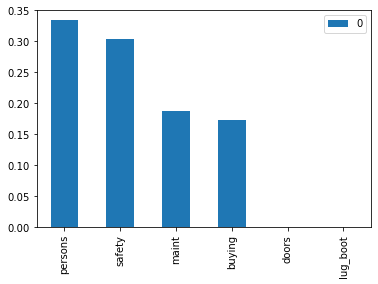

In [51]:
feature_importance.head(10).plot(kind='bar')

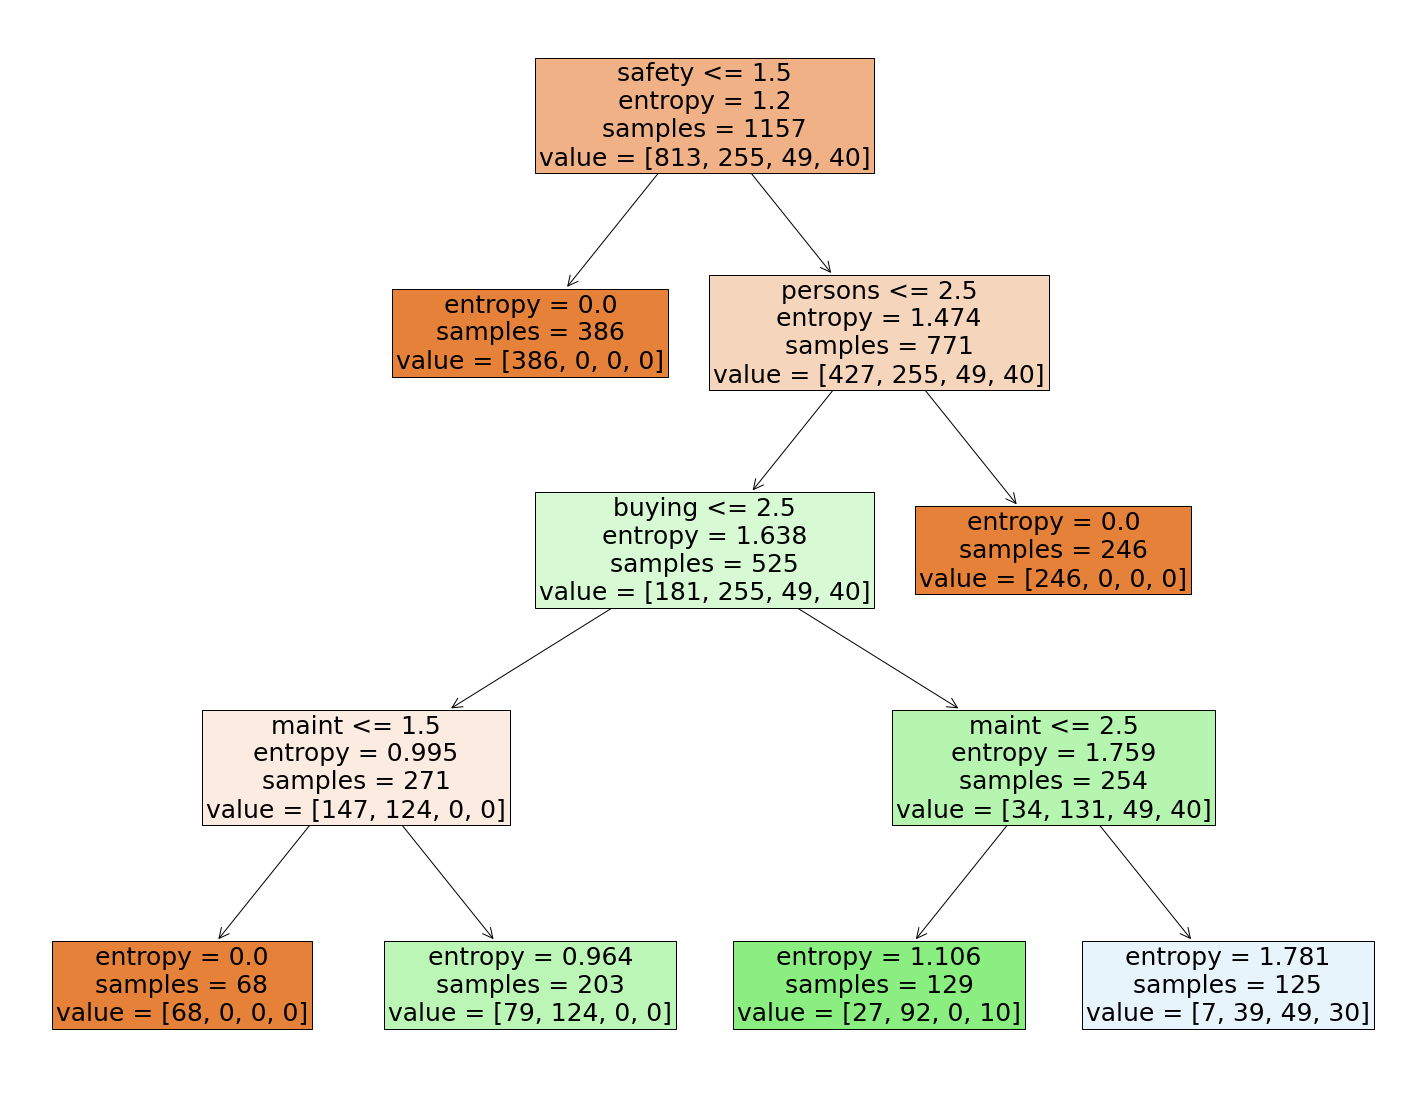

In [52]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_en,feature_names=feature_names,class_names=None
                   , filled=True,fontsize=25)

### Confusion matrix
A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [53]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

entropy_c = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', entropy_c)

Confusion matrix

 [[356  40   1   0]
 [  0 105  24   0]
 [  0   0  20   0]
 [  0   3  22   0]]


In [54]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

gini_c = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', gini_c)

Confusion matrix

 [[373  23   1   0]
 [ 16  89  24   0]
 [  0   0  20   0]
 [  0   3  22   0]]


#### Classification Report
Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       397
           1       0.71      0.81      0.76       129
           2       0.30      1.00      0.46        20
           3       0.00      0.00      0.00        25

    accuracy                           0.84       571
   macro avg       0.50      0.68      0.54       571
weighted avg       0.87      0.84      0.84       571



In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       397
           1       0.77      0.69      0.73       129
           2       0.30      1.00      0.46        20
           3       0.00      0.00      0.00        25

    accuracy                           0.84       571
   macro avg       0.51      0.66      0.53       571
weighted avg       0.85      0.84      0.84       571



### Results and conclusion
1. In this project, I have build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
2. In the model with criterion gini index, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
3. Similarly, in the model with criterion entropy, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
4. In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5. The confusion matrix and classification report yields very good model performance.